In [1]:
import numpy as np
import pandas as pd
import re
import random
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def limpar_texto(texto):
    texto = texto.lower()  # Converte tudo para minúsculas
    texto = re.sub(r'[^\w\s]', ' ', texto)  # Remove pontuações
    texto = re.sub(r'\d+', ' ', texto)      # Remove números
    texto = re.sub(r'\s+', ' ', texto)      # Substitui múltiplos espaços por um só
    return texto.strip()


In [76]:
texto_demo = """
A modelagem de linguagem natural é uma das áreas centrais dentro do campo do Processamento de Linguagem Natural (PLN), que, por sua vez, faz parte da inteligência artificial. O objetivo principal dessa técnica é permitir que computadores compreendam, interpretem, gerem e respondam a textos escritos ou falados por seres humanos de maneira coerente, fluente e, em alguns casos, até criativa. Por trás de assistentes de voz como Siri, Alexa e Google Assistente, há modelos de linguagem robustos que tornam possível a interação entre humanos e máquinas de forma natural.

Um modelo de linguagem é uma estrutura matemática ou computacional que estima a probabilidade de ocorrência de uma sequência de palavras em um idioma. Isso é essencial para prever a próxima palavra em uma frase, verificar a coerência de um texto, realizar traduções automáticas, responder perguntas e até escrever novos conteúdos. Por exemplo, se digitamos "O cachorro correu para", o modelo pode prever que a próxima palavra será "casa", "rua", "parque" ou outra palavra compatível com o contexto anterior. Essa capacidade de prever ou completar sequências é o que torna a modelagem de linguagem um componente vital de muitos sistemas inteligentes.

Historicamente, os primeiros modelos de linguagem eram baseados em regras rígidas criadas manualmente por linguistas e especialistas. Esses sistemas tentavam cobrir toda a gramática de um idioma com conjuntos complexos de regras sintáticas e morfológicas. Embora fossem úteis para tarefas específicas, sua rigidez os tornava difíceis de escalar para domínios abertos ou com vocabulário variado. Com o avanço da tecnologia e o surgimento de grandes corpora de texto digitalizados, os modelos estatísticos ganharam força, especialmente os modelos baseados em N-gramas.

Modelos N-gramas são talvez os mais simples e intuitivos entre os modelos probabilísticos. Eles funcionam assumindo que a probabilidade de uma palavra dependerá apenas de um número fixo de palavras anteriores. Por exemplo, um modelo bigrama (2-grama) considera somente a palavra anterior; um trigram (3-grama), as duas anteriores. Esses modelos contam a frequência de sequências de palavras em grandes corpora e, com isso, estimam as probabilidades de continuação de frases. Apesar de simples, os modelos de N-gramas são bastante úteis em tarefas como correção ortográfica, sugestão de palavras em teclados de smartphones e até sistemas de reconhecimento de fala.

No entanto, esses modelos enfrentam problemas notórios, como a esparsidade de dados. À medida que aumentamos o valor de "n", o número de possíveis combinações de palavras cresce exponencialmente, o que significa que muitas sequências possíveis simplesmente não aparecem nos dados de treinamento. Isso leva a problemas de zero frequência, ou seja, o modelo atribui probabilidade zero a sequências plausíveis, mas não vistas. Para resolver isso, técnicas de suavização são aplicadas, como a de Laplace, Good-Turing e Kneser-Ney, que redistribuem parte da probabilidade para essas sequências ausentes.

Outro desafio dos N-gramas é a sua limitação em capturar dependências de longo alcance. Em frases complexas, como “O menino que estava brincando no quintal do vizinho caiu da bicicleta”, a relação entre "menino" e "caiu" pode estar distante demais para um modelo de N-grama simples capturar com precisão. Esse tipo de limitação impulsionou o desenvolvimento de modelos neurais.

Os modelos neurais de linguagem representam um salto significativo em relação aos modelos estatísticos. Eles não dependem diretamente de contagens de palavras, mas sim de vetores contínuos em espaços multidimensionais, capazes de capturar semelhanças semânticas e contextos complexos. Modelos como o Word2Vec, GloVe e FastText foram pioneiros nessa abordagem, aprendendo representações densas de palavras (embeddings), em que palavras com significados semelhantes estão próximas no espaço vetorial.

Com o surgimento das redes neurais recorrentes (RNNs), e posteriormente das LSTMs (Long Short-Term Memory) e GRUs (Gated Recurrent Units), foi possível modelar sequências de forma mais dinâmica, mantendo em memória as informações de contextos mais distantes. Esses modelos começaram a apresentar desempenho superior em tarefas como geração de texto, tradução automática e classificação de sentimentos. Ainda assim, as RNNs enfrentavam dificuldades em lidar com textos muito longos, devido ao problema de gradientes explosivos ou desvanecentes.

O grande divisor de águas na modelagem de linguagem foi o surgimento da arquitetura Transformer, apresentada em 2017 no artigo "Attention is All You Need". Essa arquitetura abandonou a recorrência em favor do mecanismo de atenção, que permite ao modelo "olhar" para todas as palavras de uma sequência ao mesmo tempo, ponderando a importância de cada uma delas. Isso melhorou drasticamente a eficiência e a capacidade de capturar contextos complexos.

Com os Transformers, surgiram modelos de linguagem poderosos como BERT (Bidirectional Encoder Representations from Transformers), GPT (Generative Pretrained Transformer), RoBERTa, XLNet, entre outros. O BERT, por exemplo, é especializado em entender o contexto bidirecional das palavras e tem excelente desempenho em tarefas como perguntas e respostas, análise de sentimentos e classificação textual. Já os modelos da família GPT, com foco em geração de texto, demonstram capacidade impressionante de escrever artigos, histórias, scripts e até códigos de programação.

Esses modelos de linguagem moderna são treinados em vastas quantidades de dados e utilizam bilhões de parâmetros. Eles podem ser ajustados (fine-tuned) para tarefas específicas, exigindo muito menos dados e tempo do que treinar um modelo do zero. Com isso, mesmo empresas ou pesquisadores com recursos limitados conseguem aproveitar o poder desses modelos para suas próprias aplicações.

Entretanto, o uso de modelos de linguagem em larga escala também levanta questões importantes. Entre elas estão o consumo energético elevado para treinar modelos gigantescos, a replicação de preconceitos existentes nos dados de treinamento (como racismo, machismo, xenofobia), a dificuldade de explicar decisões dos modelos (caixa-preta), e os riscos de desinformação e uso malicioso, como na criação de fake news.

Por isso, o desenvolvimento responsável de modelos de linguagem é um tema cada vez mais discutido na academia e na indústria. Práticas como curadoria ética de dados, avaliação de vieses, auditoria algorítmica e transparência nos resultados são fundamentais para garantir o uso seguro e justo dessa tecnologia.

Atualmente, a modelagem de linguagem também avança para áreas multimodais, combinando texto com imagem, áudio e vídeo. Modelos como CLIP, DALL·E e GPT-4 Vision são exemplos de como a inteligência artificial está se aproximando cada vez mais da cognição humana, ao integrar múltiplas formas de comunicação. Outra tendência forte é a adaptação de modelos para idiomas com poucos recursos linguísticos disponíveis, promovendo inclusão digital e acessibilidade.

Em conclusão, a modelagem de linguagem natural evoluiu de sistemas baseados em regras rígidas para redes neurais profundas que aprendem com vastas quantidades de dados. Hoje, ela é um dos pilares da inteligência artificial moderna, com impacto direto em áreas como educação, saúde, negócios, entretenimento, segurança e acessibilidade. Seu desenvolvimento contínuo abre portas para interações mais humanas com as máquinas, ampliando o potencial da tecnologia no cotidiano.
"""

In [77]:
palavras = limpar_texto(texto_demo).split()
print("Quantidade de palavras:", len(palavras))
print("Exemplo:", palavras[:10])


Quantidade de palavras: 1112
Exemplo: ['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'das', 'áreas', 'centrais']


In [78]:
class ModeloNGram:
    def __init__(self, n):
        self.n = n
        self.contagens = defaultdict(Counter)
        self.modelo = {}

    def treinar(self, palavras):
        for i in range(len(palavras) - self.n + 1):
            contexto = tuple(palavras[i:i+self.n-1])
            alvo = palavras[i+self.n-1]
            self.contagens[contexto][alvo] += 1

        for contexto, alvos in self.contagens.items():
            total = sum(alvos.values())
            self.modelo[contexto] = {
                palavra: freq / total for palavra, freq in alvos.items()
            }

    def proxima_palavra(self, contexto):
        contexto = tuple(contexto[-(self.n-1):]) if self.n > 1 else ()
        if contexto in self.modelo:
            palavras = list(self.modelo[contexto].keys())
            probs = list(self.modelo[contexto].values())
            return np.random.choice(palavras, p=probs)
        return None

    def gerar_texto(self, contexto_inicial, quantidade=15):
        if isinstance(contexto_inicial, str):
            contexto_inicial = contexto_inicial.split()
        if len(contexto_inicial) < self.n - 1:
            raise ValueError(f"Contexto inicial deve ter pelo menos {self.n - 1} palavras")
        texto = list(contexto_inicial)
        for _ in range(quantidade):
            prox = self.proxima_palavra(texto)
            if not prox:
                break
            texto.append(prox)
        return ' '.join(texto)
    

In [79]:
modelo_1gram = ModeloNGram(1)
modelo_2gram = ModeloNGram(2)
modelo_3gram = ModeloNGram(3)

modelo_1gram.treinar(palavras)
modelo_2gram.treinar(palavras)
modelo_3gram.treinar(palavras)

In [80]:
def calcular_perplexidade(modelo, texto_teste):
    tokens = limpar_texto(texto_teste).split()
    log_prob = 0
    total = 0
    for i in range(modelo.n - 1, len(tokens)):
        contexto = tuple(tokens[i - modelo.n + 1:i]) if modelo.n > 1 else ()
        alvo = tokens[i]
        prob = modelo.modelo.get(contexto, {}).get(alvo, 1e-10)
        log_prob += np.log2(prob)
        total += 1
    return 2 ** (-log_prob / total) if total > 0 else float('inf')

texto_teste = """
Os modelos de linguagem são fundamentais para diversas aplicações.
A modelagem estatística ajuda a entender padrões em textos.
"""

print("Perplexidade:")
print("Unigram:", calcular_perplexidade(modelo_1gram, texto_teste))
print("Bigram:", calcular_perplexidade(modelo_2gram, texto_teste))
print("Trigram:", calcular_perplexidade(modelo_3gram, texto_teste))


Perplexidade:
Unigram: 7553.148554081883
Bigram: 4583346.572302927
Trigram: 150597799.98538414


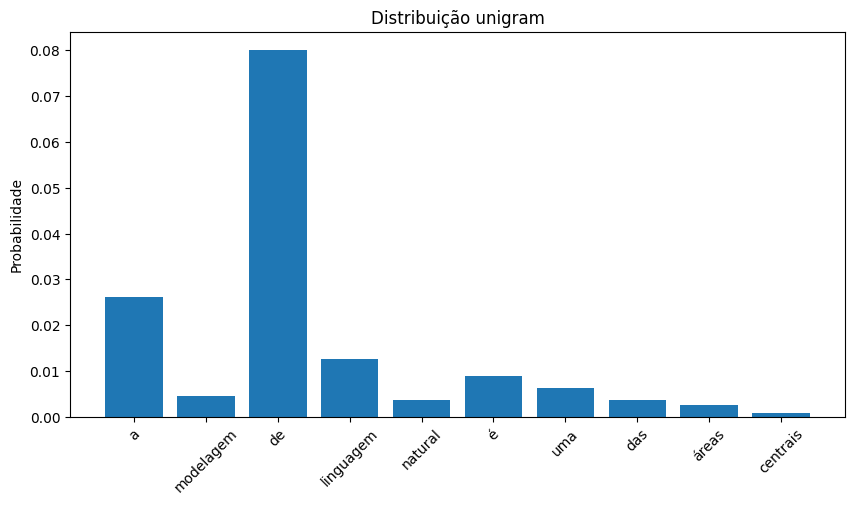

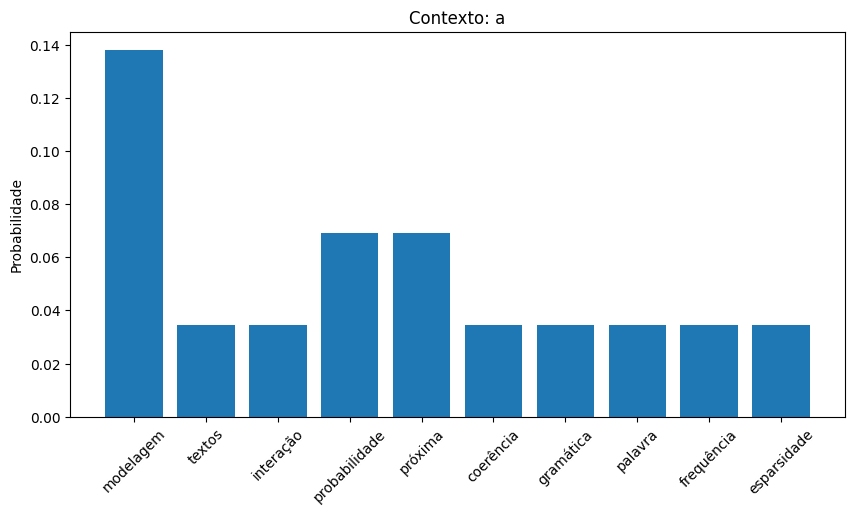

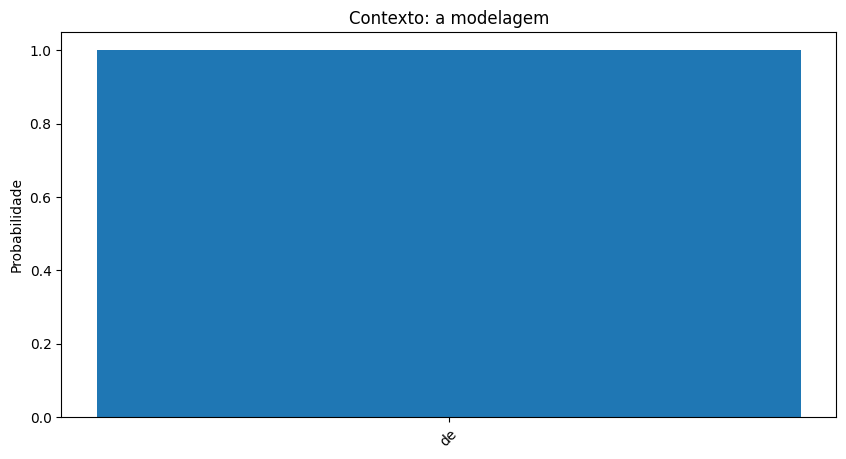

In [81]:
def mostrar_distribuicao(modelo, contexto=None):
    if modelo.n == 1:
        contexto = ()
    if contexto is None or contexto not in modelo.modelo:
        contexto = list(modelo.modelo.keys())[0]
    palavras = list(modelo.modelo[contexto].keys())
    probs = list(modelo.modelo[contexto].values())
    plt.figure(figsize=(10,5))
    plt.bar(palavras[:10], probs[:10])
    titulo = "Distribuição unigram" if modelo.n == 1 else f"Contexto: {' '.join(contexto)}"
    plt.title(titulo)
    plt.ylabel("Probabilidade")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao(modelo_1gram)
mostrar_distribuicao(modelo_2gram)
mostrar_distribuicao(modelo_3gram)

In [82]:
def distancia_edicao(s1, s2):
    if len(s1) < len(s2):
        return distancia_edicao(s2, s1)
    if len(s2) == 0:
        return len(s1)
    anterior = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        atual = [i + 1]
        for j, c2 in enumerate(s2):
            custos = [
                anterior[j + 1] + 1,
                atual[j] + 1,
                anterior[j] + (c1 != c2)
            ]
            atual.append(min(custos))
        anterior = atual
    return anterior[-1]

def sugerir_palavra(palavra, modelo):
    if palavra in modelo.modelo[()]:
        return palavra
    candidatos = []
    for voc in modelo.modelo[()]:
        dist = distancia_edicao(palavra, voc)
        if dist <= 2:
            prob = modelo.modelo[()].get(voc, 0)
            candidatos.append((voc, dist, prob))
    if not candidatos:
        return palavra
    candidatos.sort(key=lambda x: (x[1], -x[2]))
    return candidatos[0][0]

In [83]:
palavras_erradas = ["modelgem", "linguaem", "natual", "processment"]
print("Correções sugeridas:")
for erro in palavras_erradas:
    print(f"{erro} → {sugerir_palavra(erro, modelo_1gram)}")

Correções sugeridas:
modelgem → modelagem
linguaem → linguagem
natual → natural
processment → processamento


In [84]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 10))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_3gram.gerar_texto(["modelos", "de"], 50))

Textos gerados:
Unigram: e por especializado sua multimodais ou muitas palavras em modelos
Bigram: linguagem natural evoluiu de regras rígidas para áreas centrais dentro do vizinho caiu da inteligência artificial
Trigram: modelos de n gramas modelos n gramas são talvez os mais simples e intuitivos entre os modelos probabilísticos eles funcionam assumindo que a próxima palavra será casa rua parque ou outra palavra compatível com o surgimento das redes neurais profundas que aprendem com vastas quantidades de dados e tempo do que treinar


In [85]:
modelo_1gram = ModeloNGram(1)
modelo_2gram = ModeloNGram(2)
modelo_7gram = ModeloNGram(7)

modelo_1gram.treinar(palavras)
modelo_2gram.treinar(palavras)
modelo_7gram.treinar(palavras)

In [86]:
def calcular_perplexidade(modelo, texto_teste):
    tokens = limpar_texto(texto_teste).split()
    log_prob = 0
    total = 0
    for i in range(modelo.n - 1, len(tokens)):
        contexto = tuple(tokens[i - modelo.n + 1:i]) if modelo.n > 1 else ()
        alvo = tokens[i]
        prob = modelo.modelo.get(contexto, {}).get(alvo, 1e-10)
        log_prob += np.log2(prob)
        total += 1
    return 2 ** (-log_prob / total) if total > 0 else float('inf')

texto_teste = """
Os modelos de linguagem são fundamentais para diversas aplicações.
A modelagem estatística ajuda a entender padrões em textos.
"""

print("Perplexidade:")
print("Unigram:", calcular_perplexidade(modelo_1gram, texto_teste))
print("Bigram:", calcular_perplexidade(modelo_2gram, texto_teste))
print("SEVEN:", calcular_perplexidade(modelo_7gram, texto_teste))

Perplexidade:
Unigram: 7553.148554081883
Bigram: 4583346.572302927
SEVEN: 10000000000.000008


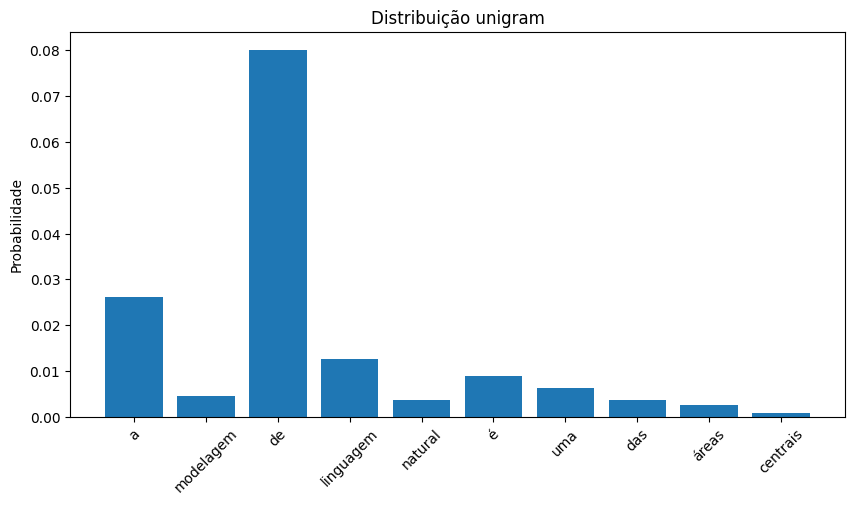

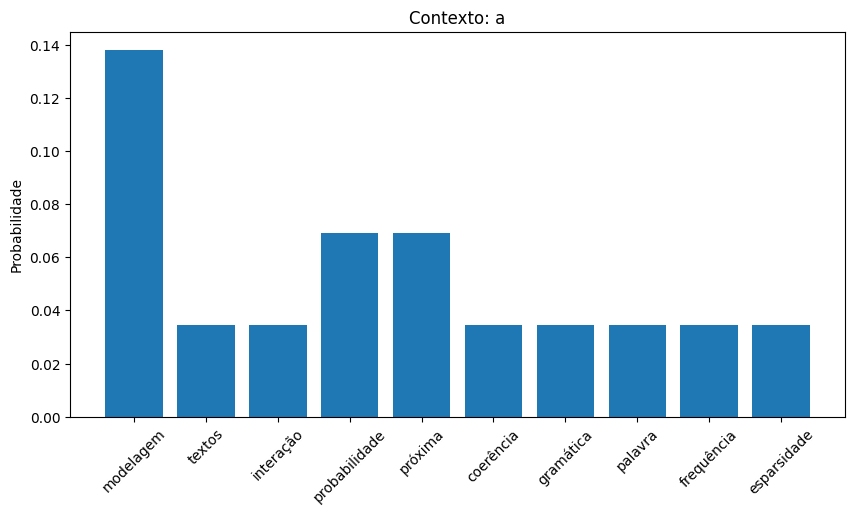

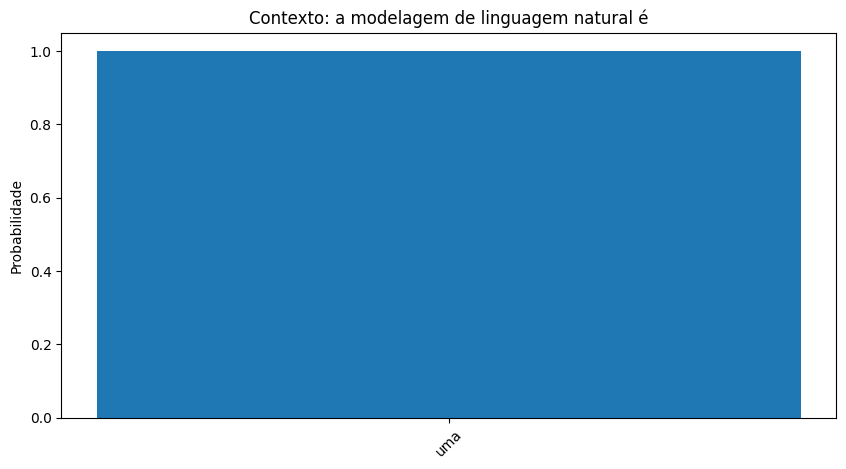

In [87]:
def mostrar_distribuicao(modelo, contexto=None):
    if modelo.n == 1:
        contexto = ()
    if contexto is None or contexto not in modelo.modelo:
        contexto = list(modelo.modelo.keys())[0]
    palavras = list(modelo.modelo[contexto].keys())
    probs = list(modelo.modelo[contexto].values())
    plt.figure(figsize=(10,5))
    plt.bar(palavras[:10], probs[:10])
    titulo = "Distribuição unigram" if modelo.n == 1 else f"Contexto: {' '.join(contexto)}"
    plt.title(titulo)
    plt.ylabel("Probabilidade")
    plt.xticks(rotation=45)
    plt.show()

mostrar_distribuicao(modelo_1gram)
mostrar_distribuicao(modelo_2gram)
mostrar_distribuicao(modelo_7gram)

In [88]:
def distancia_edicao(s1, s2):
    if len(s1) < len(s2):
        return distancia_edicao(s2, s1)
    if len(s2) == 0:
        return len(s1)
    anterior = list(range(len(s2) + 1))
    for i, c1 in enumerate(s1):
        atual = [i + 1]
        for j, c2 in enumerate(s2):
            custos = [
                anterior[j + 1] + 1,
                atual[j] + 1,
                anterior[j] + (c1 != c2)
            ]
            atual.append(min(custos))
        anterior = atual
    return anterior[-1]

def sugerir_palavra(palavra, modelo):
    if palavra in modelo.modelo[()]:
        return palavra
    candidatos = []
    for voc in modelo.modelo[()]:
        dist = distancia_edicao(palavra, voc)
        if dist <= 2:
            prob = modelo.modelo[()].get(voc, 0)
            candidatos.append((voc, dist, prob))
    if not candidatos:
        return palavra
    candidatos.sort(key=lambda x: (x[1], -x[2]))
    return candidatos[0][0]

In [89]:
palavras_erradas = ["modelgem", "linguaem", "natual", "processment"]
print("Correções sugeridas:")
for erro in palavras_erradas:
    print(f"{erro} → {sugerir_palavra(erro, modelo_1gram)}")

Correções sugeridas:
modelgem → modelagem
linguaem → linguagem
natual → natural
processment → processamento


In [90]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de"], 15))

Textos gerados:
Unigram: transformers cada que de encoder mais dentro linguagem trás vastas o pesquisadores suavização delas para
Bigram: linguagem em relação aos modelos neurais profundas que a importância de dados e caiu da família


ValueError: Contexto inicial deve ter pelo menos 6 palavras

In [104]:
class ModeloNGram:
    def __init__(self, n):
        self.n = n
        self.contagens = defaultdict(Counter)
        self.modelo = {}

    def treinar(self, palavras):
        for i in range(len(palavras) - self.n + 1):
            contexto = tuple(palavras[i:i+self.n-1])
            alvo = palavras[i+self.n-1]
            self.contagens[contexto][alvo] += 1

        for contexto, alvos in self.contagens.items():
            total = sum(alvos.values())
            self.modelo[contexto] = {
                palavra: freq / total for palavra, freq in alvos.items()
            }

    def proxima_palavra(self, contexto):
        contexto = tuple(contexto[-(self.n-1):]) if self.n > 1 else ()
        if contexto in self.modelo:
            palavras = list(self.modelo[contexto].keys())
            probs = list(self.modelo[contexto].values())
            return np.random.choice(palavras, p=probs)
        return None

    def gerar_texto(self, contexto_inicial, quantidade=15):
        if isinstance(contexto_inicial, str):
            contexto_inicial = contexto_inicial.split()
        if len(contexto_inicial) < self.n - 1:
            raise ValueError(f"Contexto inicial deve ter pelo menos {self.n - 1} palavras")
        texto = list(contexto_inicial)
        for _ in range(quantidade):
            prox = self.proxima_palavra(texto)
            if not prox:
                break
            texto.append(prox)
        return ' '.join(texto)

In [92]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de", "linguagem", "natural", "sequencia", "processamento"],50))

Textos gerados:
Unigram: combinações integrar enfrentam a corpora ocorrência explosivos são e prever em família baseados tendência natural
Bigram: linguagem natural um idioma isso mesmo tempo ponderando a modelagem de comunicação outra tendência forte é
Trigram: modelos de linguagem natural sequencia processamento


In [43]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15))
print("Trigram:", modelo_7gram.gerar_texto(["modelos", "de"],50))

Textos gerados:
Unigram: próxima de a uma natural de uma ainda úteis modelos úteis no mas linguagem modelos
Bigram: linguagem natural os modelos de linguagem podem ser usados para prever a modelagem de linguagem incluindo


ValueError: Contexto inicial deve ter pelo menos 6 palavras

In [105]:
print("Textos gerados:")
print("Unigram:", modelo_1gram.gerar_texto([], 15))
print("Bigram:", modelo_2gram.gerar_texto(["linguagem"], 15 ))
print("SEVEN", modelo_7gram.gerar_texto(['a', 'modelagem', 'de', 'linguagem', 'natural', 'é', 'uma', 'das', 'áreas', 'centrais'], 200))

Textos gerados:
Unigram: as e espaço texto ou modelos simplesmente intuitivos estrutura e formas úteis outros palavra intuitivos
Bigram: linguagem poderosos como o objetivo principal dessa técnica é essencial para essas sequências de forma mais
SEVEN a modelagem de linguagem natural é uma das áreas centrais dentro do campo do processamento de linguagem natural pln que por sua vez faz parte da inteligência artificial o objetivo principal dessa técnica é permitir que computadores compreendam interpretem gerem e respondam a textos escritos ou falados por seres humanos de maneira coerente fluente e em alguns casos até criativa por trás de assistentes de voz como siri alexa e google assistente há modelos de linguagem robustos que tornam possível a interação entre humanos e máquinas de forma natural um modelo de linguagem é uma estrutura matemática ou computacional que estima a probabilidade de ocorrência de uma sequência de palavras em um idioma isso é essencial para prever a próxima palavr